In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('testfile_somnox_labeled_predictions.csv')

# trim noise from the start and end of the file
first = df[df['label'] != 'noise'].index[0]
last = df[df['label'] != 'noise'].index[-1]
df = df.loc[first:last]

df.head()

,Unnamed: 0,ms_since_epoch,experiment_id,somnox_ax,somnox_ay,somnox_az,somnox_gx,somnox_gy,somnox_gz,time,label,predictions
0,1046,1.727300e+12,124,0.381143,-0.014894,0.002174,0.156559,0.068125,-0.071909,283779,breath_in,breath_in
1,1047,1.727300e+12,124,0.462516,-0.015737,0.002009,0.109832,0.088741,-0.067146,283980,breath_in,breath_out
2,1048,1.727300e+12,124,0.306098,-0.015761,0.001918,0.062479,0.103197,-0.057474,284180,breath_in,breath_in
3,1049,1.727300e+12,124,0.010129,-0.015125,0.001936,0.017903,0.109281,-0.045652,284380,breath_in,breath_in
4,1050,1.727300e+12,124,-0.263994,-0.014176,0.002048,-0.026851,0.107609,-0.033443,284580,breath_in,breath_in


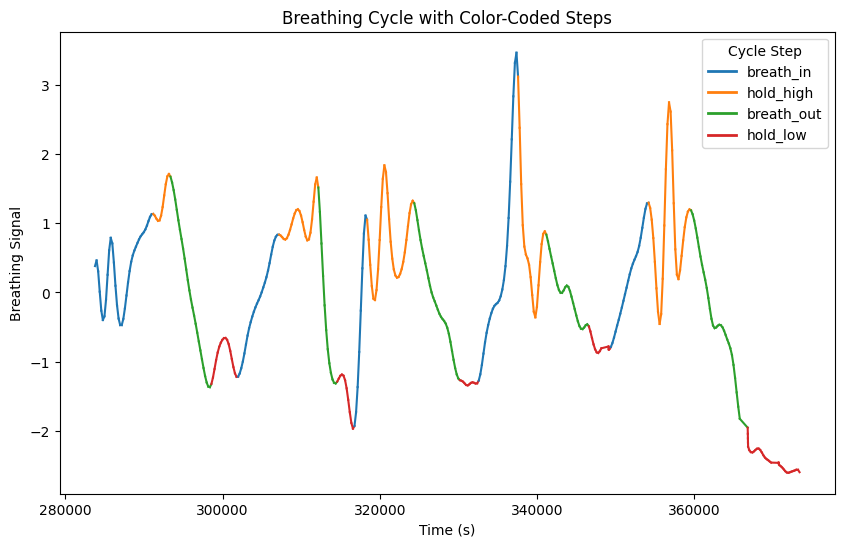

In [2]:
# create an array of the distinct labels in df
labels = df['label'].unique()

# Define colors for each cycle step
palette = sns.color_palette('tab10', n_colors=labels.size)  # Use Seaborn palette
cycle_colors = dict(zip(labels, palette))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through the data and plot segments
for i in range(len(df) - 1):
    # Plot a line segment only if the same cycle step is shared
    color = cycle_colors[df['label'].iloc[i]]
    ax.plot(df['time'].iloc[i:i+2], df['somnox_ax'].iloc[i:i+2], color=color)

# Add labels and legend
handles = [plt.Line2D([0], [0], color=color, lw=2, label=step) for step, color in cycle_colors.items()]
ax.legend(handles=handles, title='Cycle Step')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Breathing Signal')
ax.set_title('Breathing Cycle with Color-Coded Steps')

plt.show()

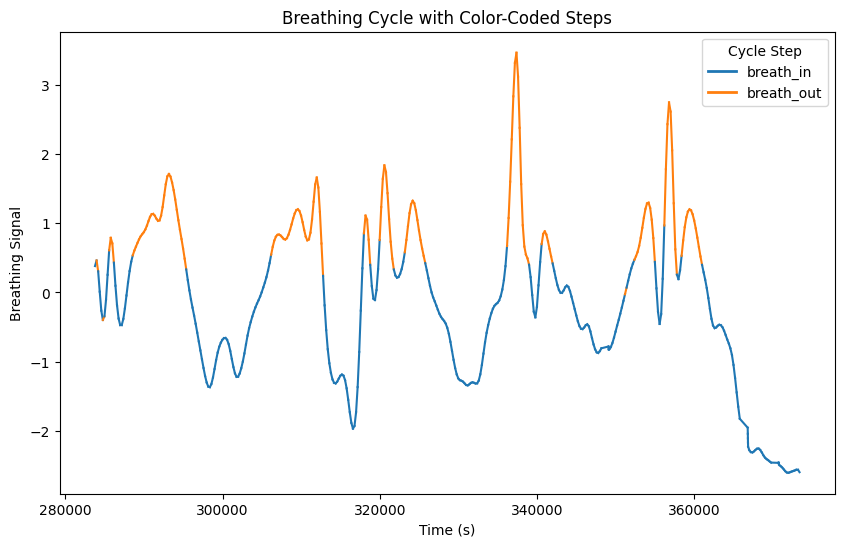

In [3]:
# create an array of the distinct labels in df
labels = df['predictions'].unique()

# Define colors for each cycle step
palette = sns.color_palette('tab10', n_colors=labels.size)  # Use Seaborn palette
cycle_colors = dict(zip(labels, palette))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through the data and plot segments
for i in range(len(df) - 1):
    # Plot a line segment only if the same cycle step is shared
    color = cycle_colors[df['predictions'].iloc[i]]
    ax.plot(df['time'].iloc[i:i+2], df['somnox_ax'].iloc[i:i+2], color=color)

# Add labels and legend
handles = [plt.Line2D([0], [0], color=color, lw=2, label=step) for step, color in cycle_colors.items()]
ax.legend(handles=handles, title='Cycle Step')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Breathing Signal')
ax.set_title('Breathing Cycle with Color-Coded Steps')

plt.show()